Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38
R² Score: 0.77


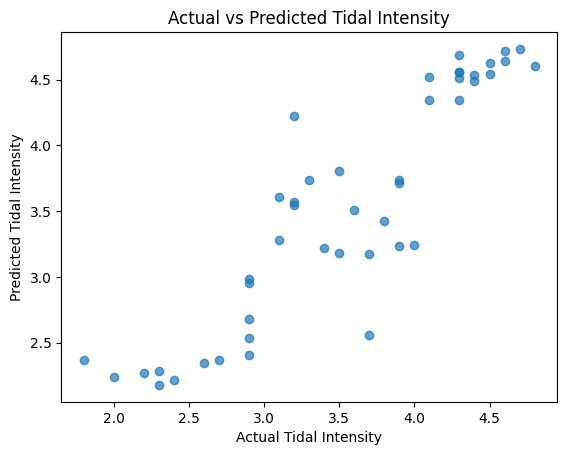

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import re

# Step 1: Load the Data
data = pd.read_csv("static\\tidal_data_updated.csv")

# Step 2: Extract numerical tidal_intensity from the string
# Extract the numerical part before the space (e.g., 2.1 from '2.1 (Low)')
data['tidal_intensity_value'] = data['tidal_intensity'].apply(lambda x: float(re.match(r'([0-9.]+)', x).group(1)))

# Step 3: Prepare the Features (X) and Target (y)
X = data[['lunar_phase', 'earth_moon_distance']]  # Features: lunar_phase, earth_moon_distance
y = data['tidal_intensity_value']  # Target: numerical tidal_intensity value

# Step 4: Normalize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train the Model (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict on Test Data
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Visualize Predictions vs Actuals
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Tidal Intensity")
plt.ylabel("Predicted Tidal Intensity")
plt.title("Actual vs Predicted Tidal Intensity")
plt.show()


In [3]:
# Import necessary libraries
import joblib

# Step 9: Save the trained model to a file
joblib.dump(model, 'tidal_intensity_model.pkl')

print("Model saved to 'tidal_intensity_model.pkl'")


Model saved to 'tidal_intensity_model.pkl'


In [4]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X_train is your training data (features for predicting tidal intensity)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data

# Train the model
model.fit(X_train_scaled, y_train)  # y_train is the target (tidal intensity)

# Save the model and scaler
joblib.dump(model, "tidal_intensity_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']